In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# read the dataset
data = pd.read_csv('creditcard.csv')

In [29]:
# read top 5 rows of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
# checking the dimension of the dataset
data.shape

(284807, 31)

In [31]:
# determine number of thefraud cases in the dataset 
fraud = data[data['Class']==1]
valid = data [data['Class']==0]
outlierFraction = len(fraud)/float(len(valid))
outlierFraction

0.0017304750013189597

In [32]:
# find number of fraud Cases
print('fraud Cases')
format(len(data[data['Class']==1]))

fraud Cases


'492'

In [33]:
 # find number of valid cases
print('valid Transactions')
format(len(data[data['Class']==0]))

valid Transactions


'284315'

In [34]:
print("Account detail of the fraudulent transactions")
fraud.Amount.describe()

Account detail of the fraudulent transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [35]:
print("Account detail of valid treansactions")
valid.Amount.describe()

Account detail of valid treansactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [36]:
import seaborn as sns

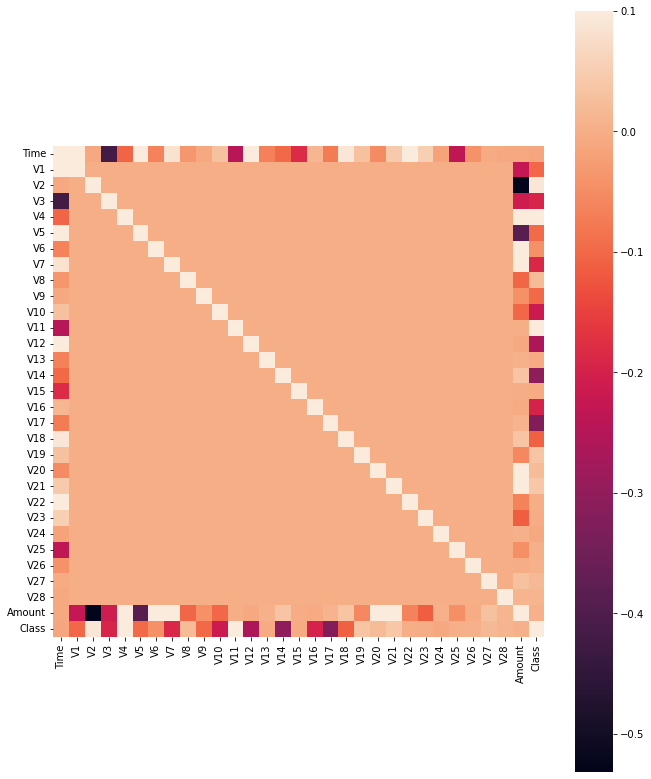

In [37]:
# Correlation Matrix
corrmat = data.corr()
fig = plt.figure(figsize = (11,14))
sns.heatmap(corrmat , vmax=.10 ,square = True)
plt.show()

In [38]:
# Dividing the x and y from the dataset
# feature
X = data.drop(['Class'] , axis = 1) 
# target
Y = data['Class']

In [39]:
X.shape

(284807, 30)

In [40]:
Y.shape

(284807,)

In [41]:
X.values

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [42]:
Y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
xdata = X.values
ydata = Y.values

# *splitting the dataset in to train and test

In [44]:
from sklearn.model_selection import train_test_split
xTrain , xTest , yTrain , yTest = train_test_split(xdata , ydata , test_size = .20 , random_state =12)

* # feature Scaling 

In [45]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_train = std.fit_transform(xTrain)
std_test = std.fit_transform(xTest)

# Decision Tree 

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [47]:
dt.score(xTest, yTest)

0.9991397773954567

In [48]:
dt.score(xTrain,yTrain)

1.0

# VISUALIZING

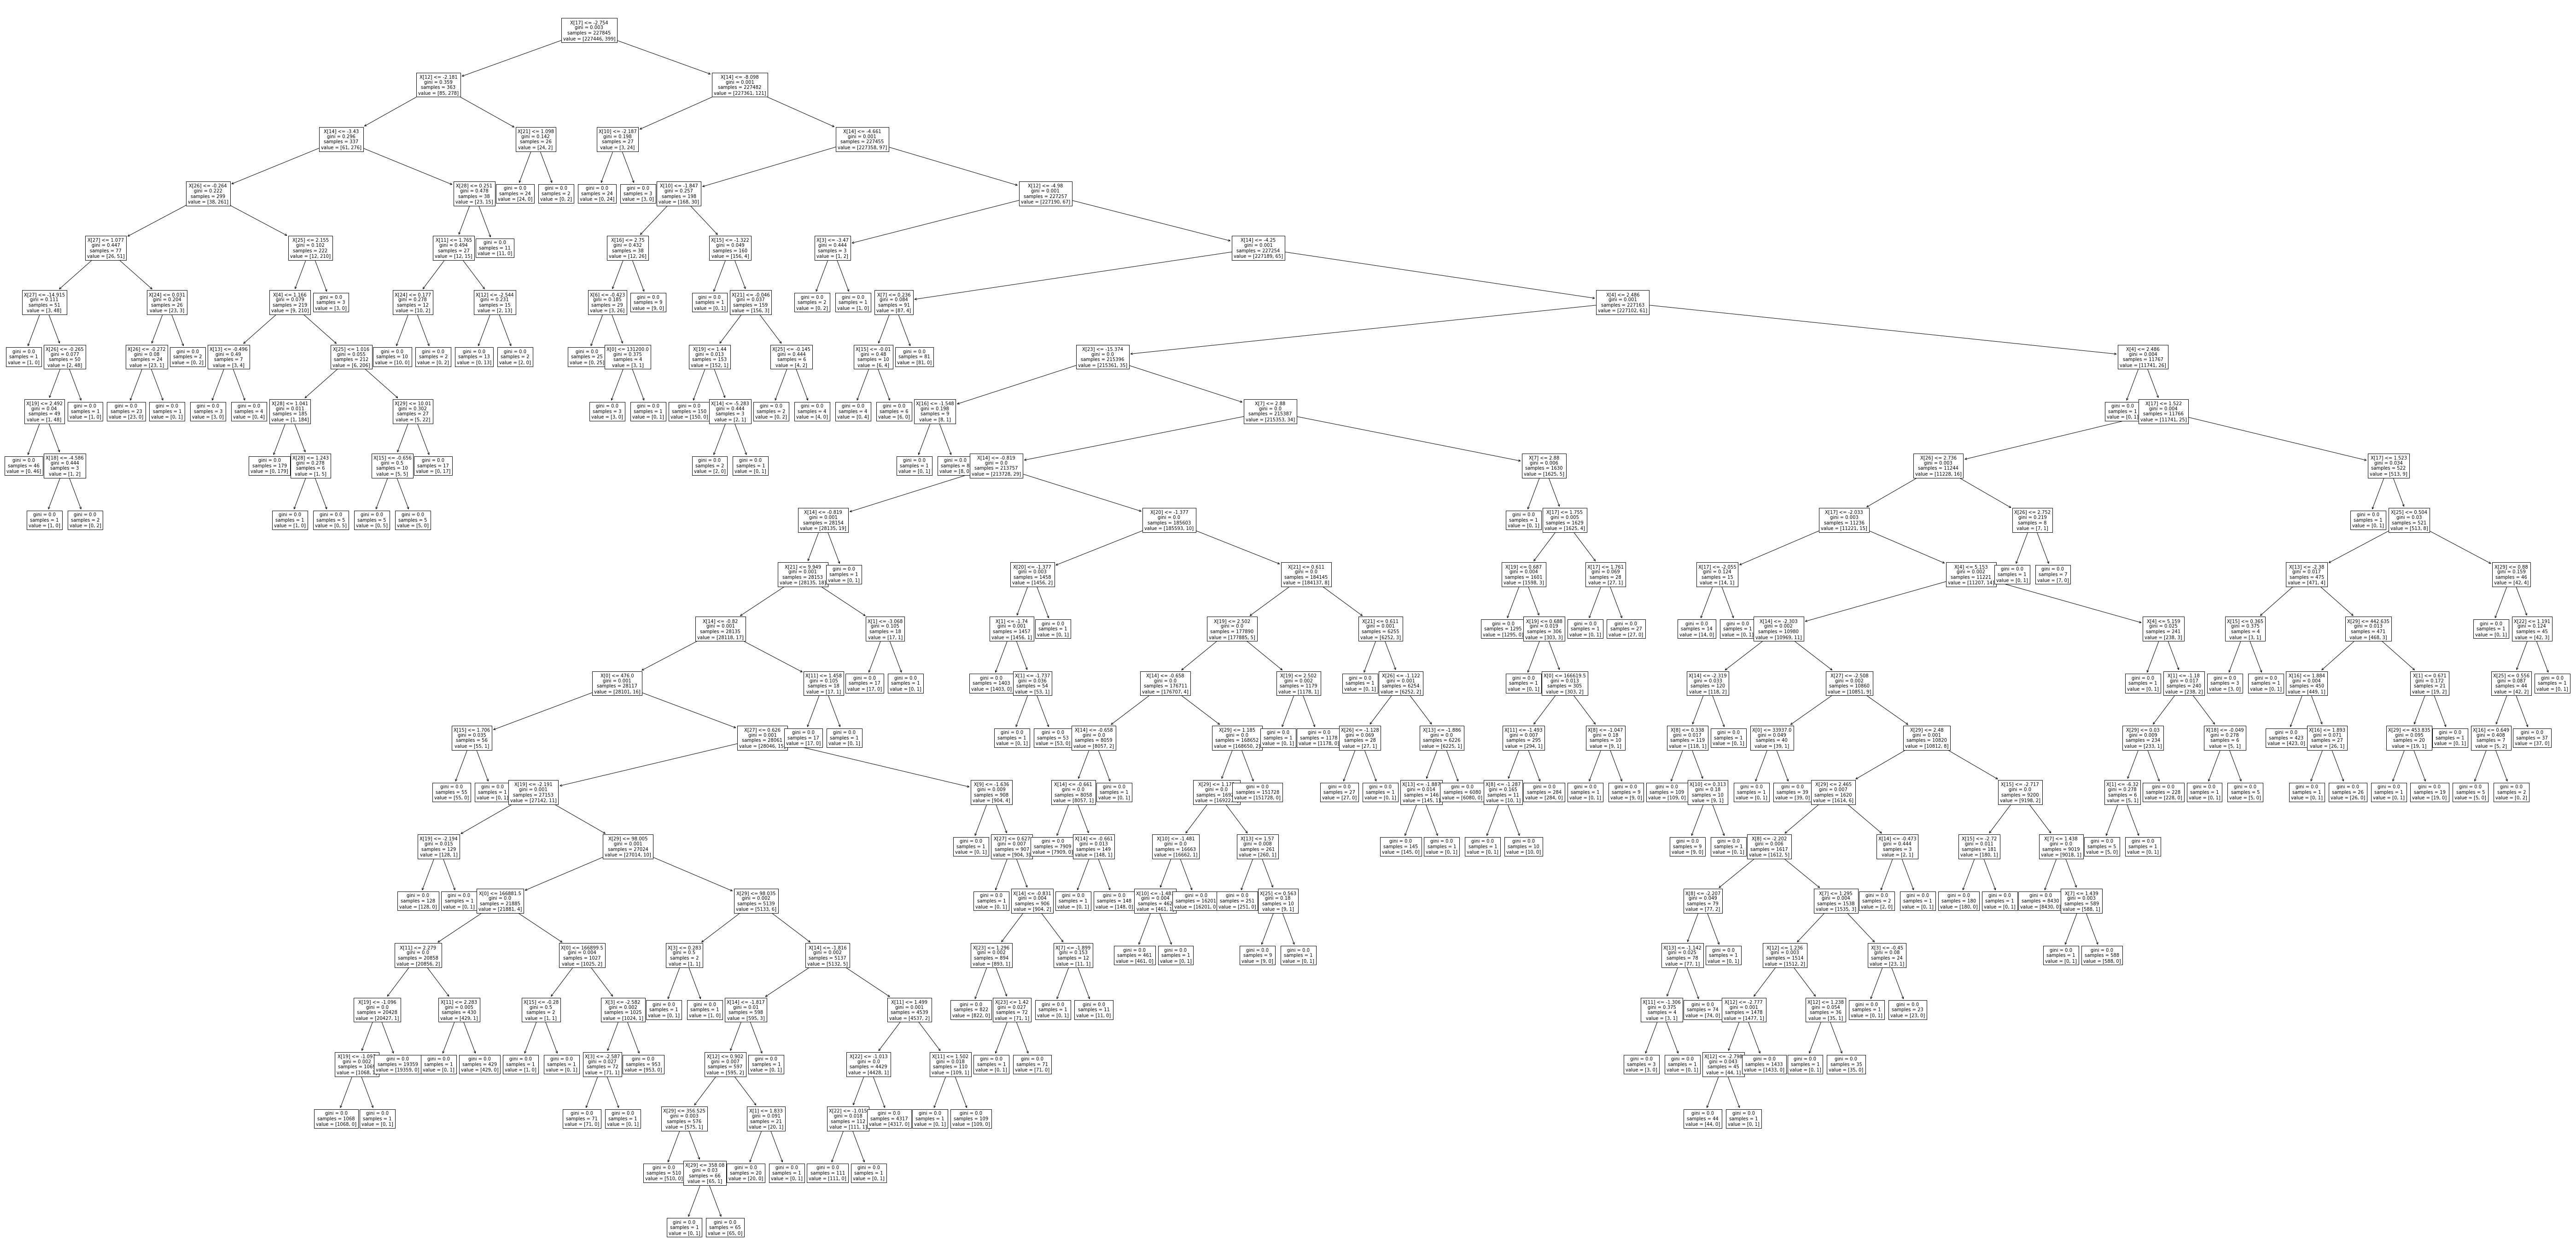

In [49]:
from sklearn import tree
fig,ax=plt.subplots(figsize = (100,50))
tree.plot_tree(dt,fontsize=10)
plt.show()